## 明星圖像爬取

In [19]:
import requests
res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format('周子瑜', 200))
res

<Response [200]>

In [20]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [26]:
path = 'idol1/'
for link in soup.select('img'):
    res = requests.get(link.get('src'))
    fname = path + link.get('src').split('tbn:')[1] +'.jpg'
    with open(fname, 'wb') as f:
        f.write(res.content)

In [27]:
import requests
from bs4 import BeautifulSoup
for n in range(0,3):
    res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format('周子瑜', n * 100))
    soup = BeautifulSoup(res.text, 'lxml')
    path = 'idol1/'
    for link in soup.select('img'):
        res = requests.get(link.get('src'))
        fname = path + link.get('src').split('tbn:')[1] +'.jpg'
        with open(fname, 'wb') as f:
            f.write(res.content)

In [29]:
import requests
from bs4 import BeautifulSoup
def getIdolPicture(path, idol):
    for n in range(0,3):
        res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format(idol, n * 100))
        soup = BeautifulSoup(res.text, 'lxml')
        #path = 'idol1/'
        for link in soup.select('img'):
            res = requests.get(link.get('src'))
            fname = path + link.get('src').split('tbn:')[1] +'.jpg'
            with open(fname, 'wb') as f:
                f.write(res.content)

In [30]:
getIdolPicture('idol2/', '郭雪芙')

In [31]:
getIdolPicture('idol3/', '林志玲')

## 臉部偵測

In [35]:
! pip install opencv_python-3.4.3-cp36-cp36m-win_amd64.whl

Processing c:\users\user\opencv_python-3.4.3-cp36-cp36m-win_amd64.whl


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
import cv2

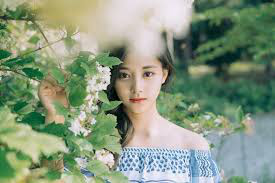

In [44]:
from PIL import Image
img = Image.open('idol1/ANd9GcS2VrzjcNpJ_Ar1PTHTTv88C2jxWBMeI2StTviVuEt3mdnAdCSl.jpg')
img

In [45]:
import cv2 as cv
imgary = cv.imread('idol1/ANd9GcS2VrzjcNpJ_Ar1PTHTTv88C2jxWBMeI2StTviVuEt3mdnAdCSl.jpg')

In [46]:
imgary.shape

(183, 275, 3)

In [47]:
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

In [50]:
?face_cascade.detectMultiScale

In [49]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(imgary, 1.3, 5)

In [52]:
x,y,w,h = faces[0]

In [54]:
crpim = img.crop((x,y, x + w, y + h)).resize((64,64))

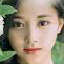

In [55]:
crpim

In [56]:
import os
os.mkdir('idol1_face/')

In [60]:
src_dir  = 'idol1/'
dest_dir = 'idol1_face/'
for f in os.listdir(src_dir):
    filename = src_dir + f
    img = Image.open(filename)
    imgary = cv.imread(filename)
    faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
    if len(faces) == 1:
        x,y,w,h = faces[0]
        crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
        crpim.save(dest_dir + f)

In [62]:
import os
os.path.exists('idol1_face/')

True

In [63]:
def extractFace(src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)
        
    for f in os.listdir(src_dir):
        filename = src_dir + f
        img = Image.open(filename)
        imgary = cv.imread(filename)
        faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
        if len(faces) == 1:
            x,y,w,h = faces[0]
            crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
            crpim.save(dest_dir + f)

In [65]:
extractFace('idol3/', 'idol3_face/')

## 使用CNN識別明星

### 建構卷積神經網路

In [62]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [63]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [64]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
import os
idol1 = os.listdir('idol1_face/')
idol2 = os.listdir('idol2_face/')
idol3 = os.listdir('idol3_face/')

In [26]:
from sklearn.model_selection import train_test_split
idol1_train ,idol1_test  = \
    train_test_split(idol1, test_size = 0.2, random_state = 42)
idol2_train ,idol2_test  = \
    train_test_split(idol2, test_size = 0.2, random_state = 42)
idol3_train ,idol3_test  = \
    train_test_split(idol3, test_size = 0.2, random_state = 42)

In [27]:
len(idol1_train)

168

In [28]:
len(idol1_test)

43

In [15]:
os.mkdir('trainset')

In [17]:
os.mkdir('trainset/idol1_face')
os.mkdir('trainset/idol2_face')
os.mkdir('trainset/idol3_face')

In [16]:
os.mkdir('testset')

In [18]:
os.mkdir('testset/idol1_face')
os.mkdir('testset/idol2_face')
os.mkdir('testset/idol3_face')

In [19]:
from shutil import copyfile

for f in idol1_train:
    src = 'idol1_face/'+ f
    dst = 'trainset/'+'idol1_face/'+f
    copyfile(src, dst)

In [29]:
def copyFileToDst(dataset, datafolder, srcfolder):
    for f in dataset:
        src = srcfolder+ f
        dst = datafolder+srcfolder+f
        copyfile(src, dst)

In [30]:
copyFileToDst(idol2_train, 'trainset/', 'idol2_face/')

In [31]:
copyFileToDst(idol3_train, 'trainset/', 'idol3_face/')

In [32]:
copyFileToDst(idol1_test, 'testset/', 'idol1_face/')

In [33]:
copyFileToDst(idol2_test, 'testset/', 'idol2_face/')

In [34]:
copyFileToDst(idol3_test, 'testset/', 'idol3_face/')

In [65]:
training_set = train_datagen.flow_from_directory(
    'trainset/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 377 images belonging to 3 classes.


In [66]:
test_set = test_datagen.flow_from_directory(
    'testset/', target_size = (64, 64),
    batch_size = 10, 
    class_mode = 'categorical')

Found 96 images belonging to 3 classes.


In [70]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=30,
                         steps_per_epoch = 30,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/10
 2/30 [=>............................] - ETA: 2s - loss: 0.0017 - acc: 1.0000

C:\ProgramData\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\ProgramData\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=30, verbose=1, validation_data=<keras_pre..., epochs=10, validation_steps=30)`
  


30/30 [==============================] - 2s 71ms/step - loss: 0.0305 - acc: 0.9933 - val_loss: 1.2695 - val_acc: 0.8021
Epoch 2/10
30/30 [==============================] - 2s 69ms/step - loss: 0.0814 - acc: 0.9633 - val_loss: 0.8932 - val_acc: 0.7951
Epoch 3/10
30/30 [==============================] - 2s 71ms/step - loss: 0.0468 - acc: 0.9833 - val_loss: 0.8382 - val_acc: 0.8472
Epoch 4/10
30/30 [==============================] - 2s 71ms/step - loss: 0.0335 - acc: 0.9900 - val_loss: 1.2465 - val_acc: 0.7326
Epoch 5/10
30/30 [==============================] - 2s 75ms/step - loss: 0.0211 - acc: 0.9967 - val_loss: 0.9655 - val_acc: 0.8403
Epoch 6/10
30/30 [==============================] - 2s 72ms/step - loss: 0.0283 - acc: 0.9833 - val_loss: 0.9811 - val_acc: 0.7986
Epoch 7/10
30/30 [==============================] - 2s 69ms/step - loss: 0.0178 - acc: 0.9933 - val_loss: 1.3693 - val_acc: 0.7917
Epoch 8/10
30/30 [==============================] - 2s 71ms/step - loss: 0.0180 - acc: 0.9967 

## 利用模型分類圖片

In [71]:
url = 'https://www.elle.com.hk/var/ellehk/storage/images/celebrity/feature/chou-tsz-yu/25904963-1-chi-HK/13_img_885_590.png'

In [73]:
import requests
res = requests.get(url)
with open('zhiyu.png', 'wb') as f:
    f.write(res.content)

In [75]:
from PIL import Image
img = Image.open('zhiyu.png')

In [80]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv.imread('zhiyu.png')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces[0]

array([398, 142, 245, 245], dtype=int32)

In [81]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)

im = Image.open('zhiyu.png')
crpim = im.crop(box).resize((64,64))
crpim.save('zhiyu_face.png')

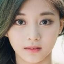

In [82]:
Image.open('zhiyu_face.png')

In [83]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('zhiyu_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [84]:
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape


(1, 64, 64, 3)

In [85]:
classifier.predict_classes(test_image)

array([0], dtype=int64)

In [87]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv.imread('puff.png')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces[0]

array([112, 125, 280, 280], dtype=int32)

In [88]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)

im = Image.open('puff.png')
crpim = im.crop(box).resize((64,64))
crpim.save('puff_face.png')

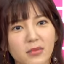

In [89]:
Image.open('puff_face.png')

In [90]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('puff_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [91]:
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape


(1, 64, 64, 3)

In [92]:
classifier.predict_classes(test_image)

array([1], dtype=int64)